* [PEP 465 -- A dedicated infix operator for matrix multiplication](https://www.python.org/dev/peps/pep-0465/)

In [39]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

from helper import linear_regression as lr  # my own module
from helper import general as general

import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


In [40]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit'])

data.head()

,population,profit
0,7.1101,18.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# compute cost
<img style="float: left;" src="../img/linear_cost.png">

In [41]:
X = general.get_X(data)
print(X.shape, type(X))

y = general.get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [42]:
theta = np.zeros(X.shape[1])

In [43]:
lr.cost(theta, X, y)

32.259249341373199

# batch gradient decent
<img style="float: left;" src="../img/linear_gradient.png">

In [73]:
epoch = 500
final_theta, cost_data = lr.batch_gradient_decent(theta, X, y, epoch)
cost_data[-1]

4.6958907816637767

In [45]:
# compute final cost
lr.cost(final_theta, X, y)
print (final_theta)

[-2.32704422  1.03710659]


# visualize cost data

C:\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


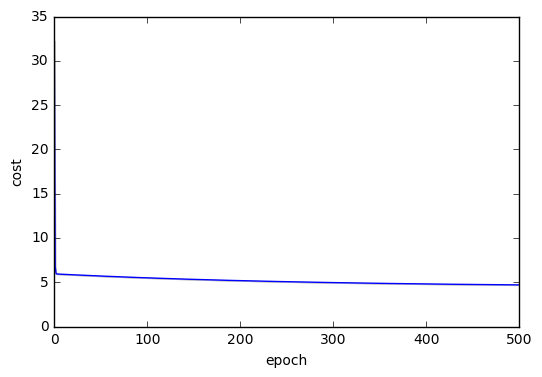

In [46]:
ax = sns.tsplot(cost_data, time=np.arange(epoch+1))
ax.set_xlabel('epoch')
ax.set_ylabel('cost')

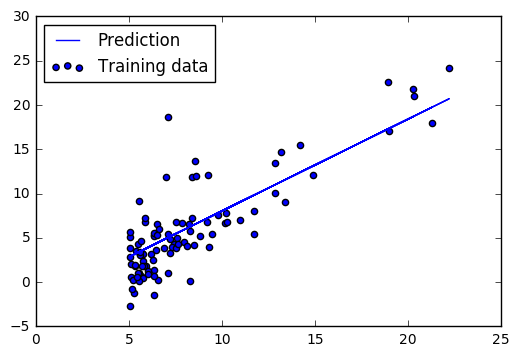

In [47]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)

[-3.97979653  1.20307336]
4.44816110129


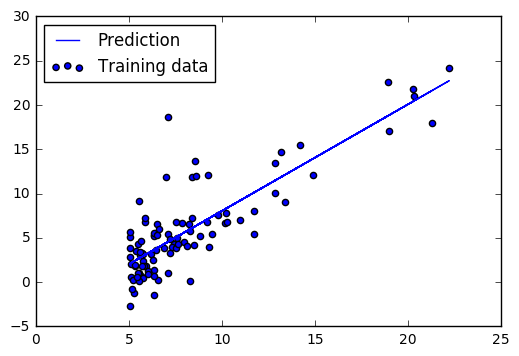

In [77]:

ne_theta = lr.normal_equations(X, y)
print (ne_theta)
print (lr.cost(ne_theta, X, y))
b = ne_theta[0] # intercept
m = ne_theta[1] # slope

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)